# Clustering 3k PBMCs following a Seurat Tutorial

This started out (July 2017) with a demonstration that Scanpy would allow to reproduce most of Seurat's ([Satija *et al.*, 2015](https://doi.org/10.1038/nbt.3192)) clustering tutorial ([link](http://satijalab.org/seurat/pbmc3k_tutorial.html)), which we gratefully acknowledge. In the meanwhile, we have added and removed several pieces.

The data consists in *3k PBMCs from a Healthy Donor* and is freely available from 10x Genomics ([here](http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz) from this [webpage](https://support.10xgenomics.com/single-cell-gene-expression/datasets/1.1.0/pbmc3k)).

In [1]:
import numpy as np
import pandas as pd
import scanpy.api as sc
from scipy import sparse, io
from collections import Counter
import os.path
from sklearn.metrics.cluster import adjusted_rand_score
import matplotlib.pyplot as plt

# import utils
import seurat_utils
plt.ion()
plt.show()
sc.settings.set_figure_params(dpi=80)
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
results_file = '../write/pbmc3k.h5ad'

/home/mada/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


scanpy==1.3.3 anndata==0.6.13 numpy==1.14.2 scipy==1.0.0 pandas==0.22.0 scikit-learn==0.19.1 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 
scanpy==1.3.3 anndata==0.6.13 numpy==1.14.2 scipy==1.0.0 pandas==0.22.0 scikit-learn==0.19.1 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
%load_ext autoreload
import importlib
importlib.reload(seurat_utils)

scanpy==1.3.3 anndata==0.6.13 numpy==1.14.2 scipy==1.0.0 pandas==0.22.0 scikit-learn==0.19.1 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


<module 'seurat_utils' from '/home/mada/ml/single-cell-sota/seurat/seurat_utils.py'>

# Input datasets

In [3]:
inputDatasets = ['deng']
results = []

## No total counts filter/ regression

... reading from cache file ./cache/input-deng-matrix.h5ad
Loading dataset deng with 22431 genes and 268 cells
filtered out 2528 genes that are detected in less than 3 cells


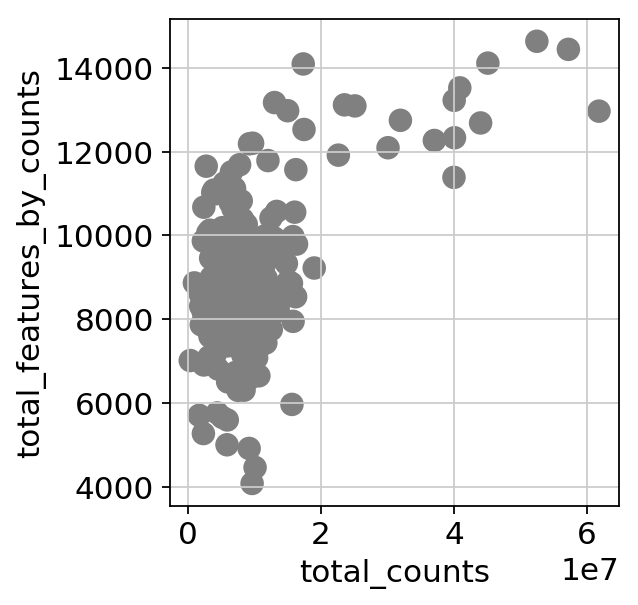

Filtering Counter({False: 13811, True: 6092})


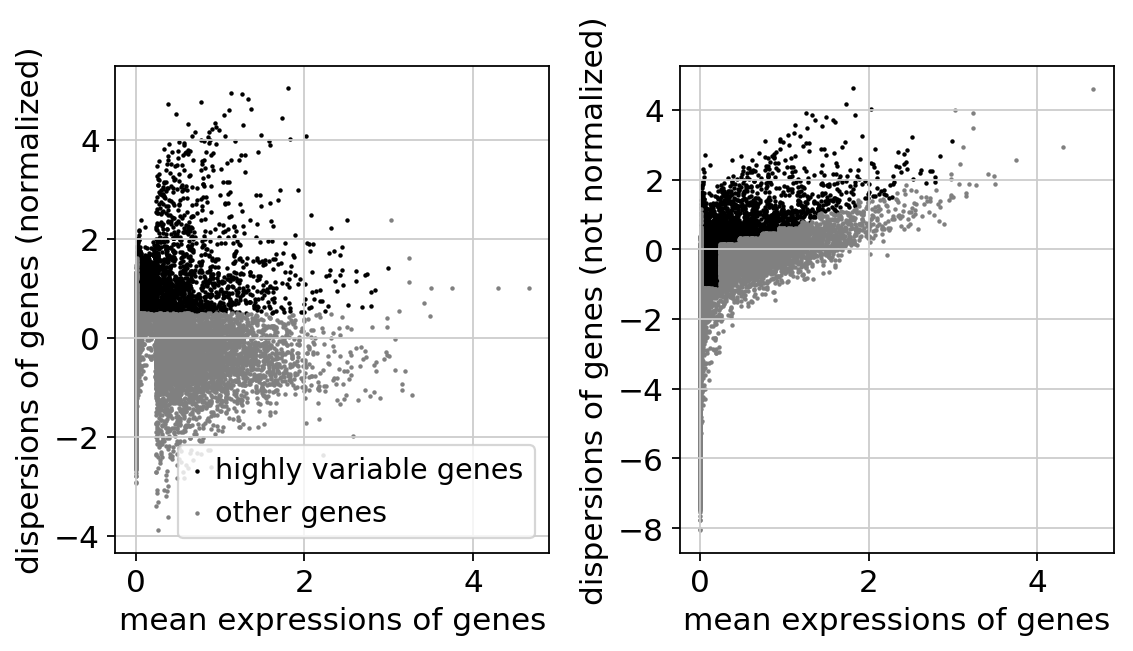

Keeping 6092 genes
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:03.10) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing UMAP
    finished (0:00:01.59) --> added
    'X_umap', UMAP coordinates (adata.obsm)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.07) --> found 10 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
Rand_index 0.48494279882915753


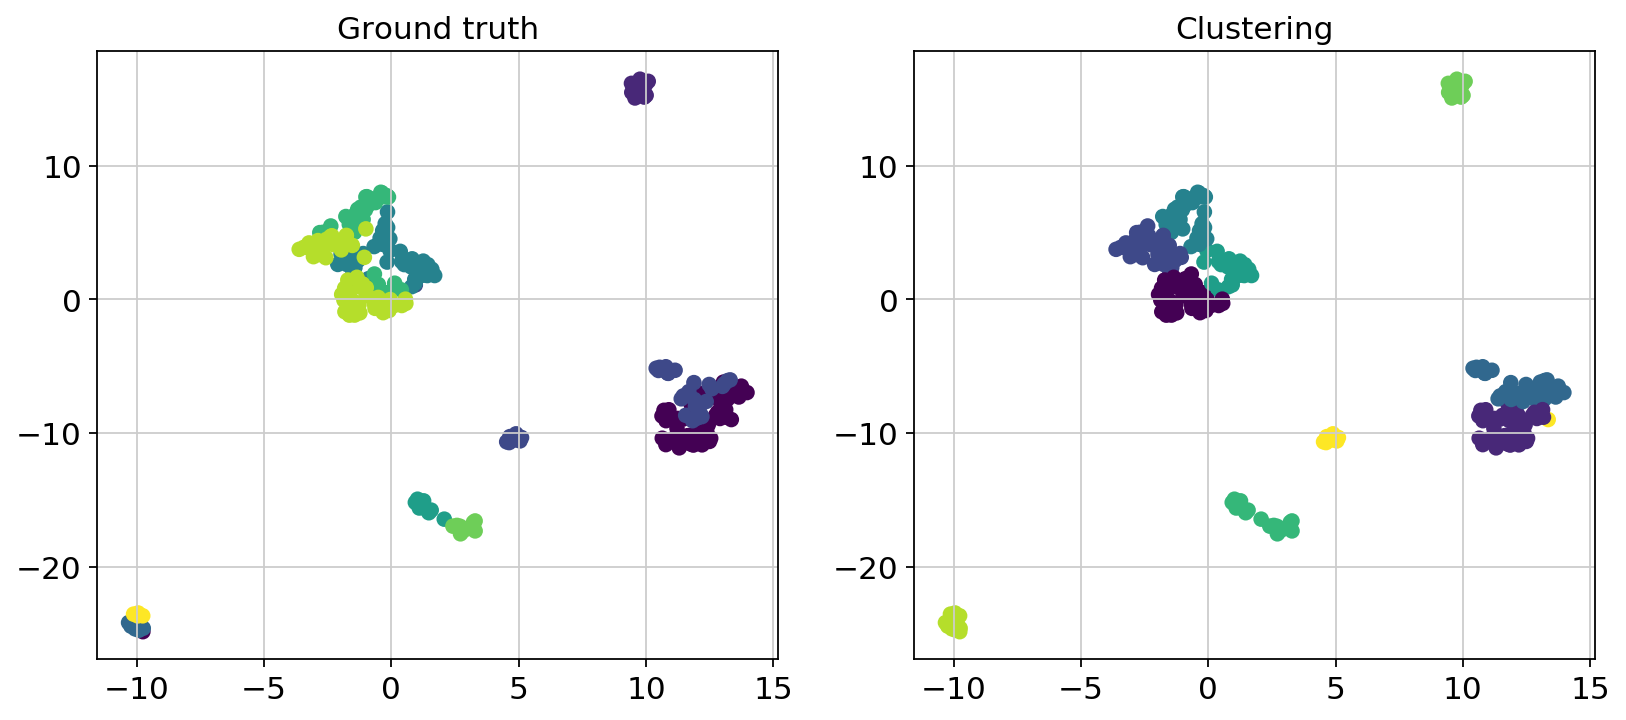

In [4]:
params = {}
params['load_inputDataset'] = inputDatasets[0]
params['preprocess_min_genes'] = 200
params['preprocess_min_cells'] = 3
# Define on the dataset
params['preprocess_teta_total_features'] = None
params['preprocess_normalize_per_cell'] = True
params['preprocess_filter_min_mean'] = 0.0125
params['preprocess_filter_max_mean']=3
params['preprocess_filter_min_disp']=0.5
params['preprocess_regress_out']=None
params['preprocess_scale']=10

params['cluster_n_neighbors'] = 10
params['cluster_n_pcs'] = 40
params['cluster_plot_pca'] = False

params['evaluate_plot_results'] = True
resultDict = seurat_utils.run(params)
results.append(resultDict)

## No gene filtering based on dispertion

... reading from cache file ./cache/input-deng-matrix.h5ad
Loading dataset deng with 22431 genes and 268 cells
filtered out 2528 genes that are detected in less than 3 cells


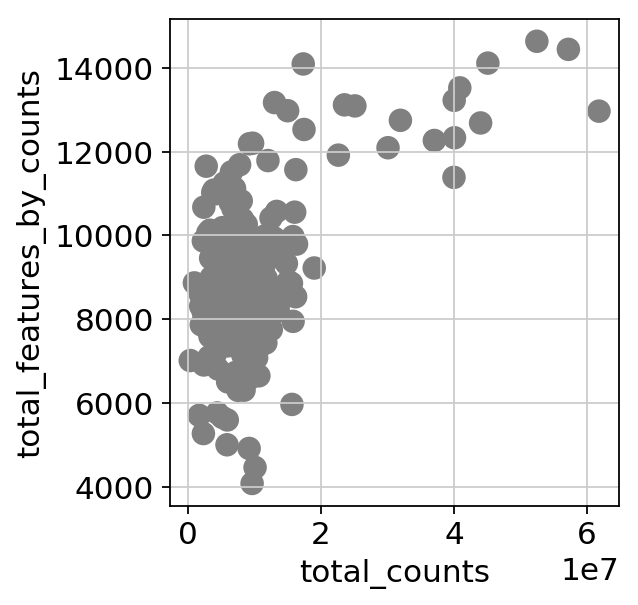

No dispertion gene filter


/home/mada/anaconda3/lib/python3.6/site-packages/scanpy/preprocessing/simple.py:1000: RuntimeWarning: invalid value encountered in true_divide
  X /= scale
/home/mada/anaconda3/lib/python3.6/site-packages/scanpy/preprocessing/simple.py:788: RuntimeWarning: invalid value encountered in greater
  if max_value is not None: X[X > max_value] = max_value


computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:00.11) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing UMAP
    finished (0:00:00.57) --> added
    'X_umap', UMAP coordinates (adata.obsm)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.00) --> found 9 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
Rand_index 0.31012203784383763


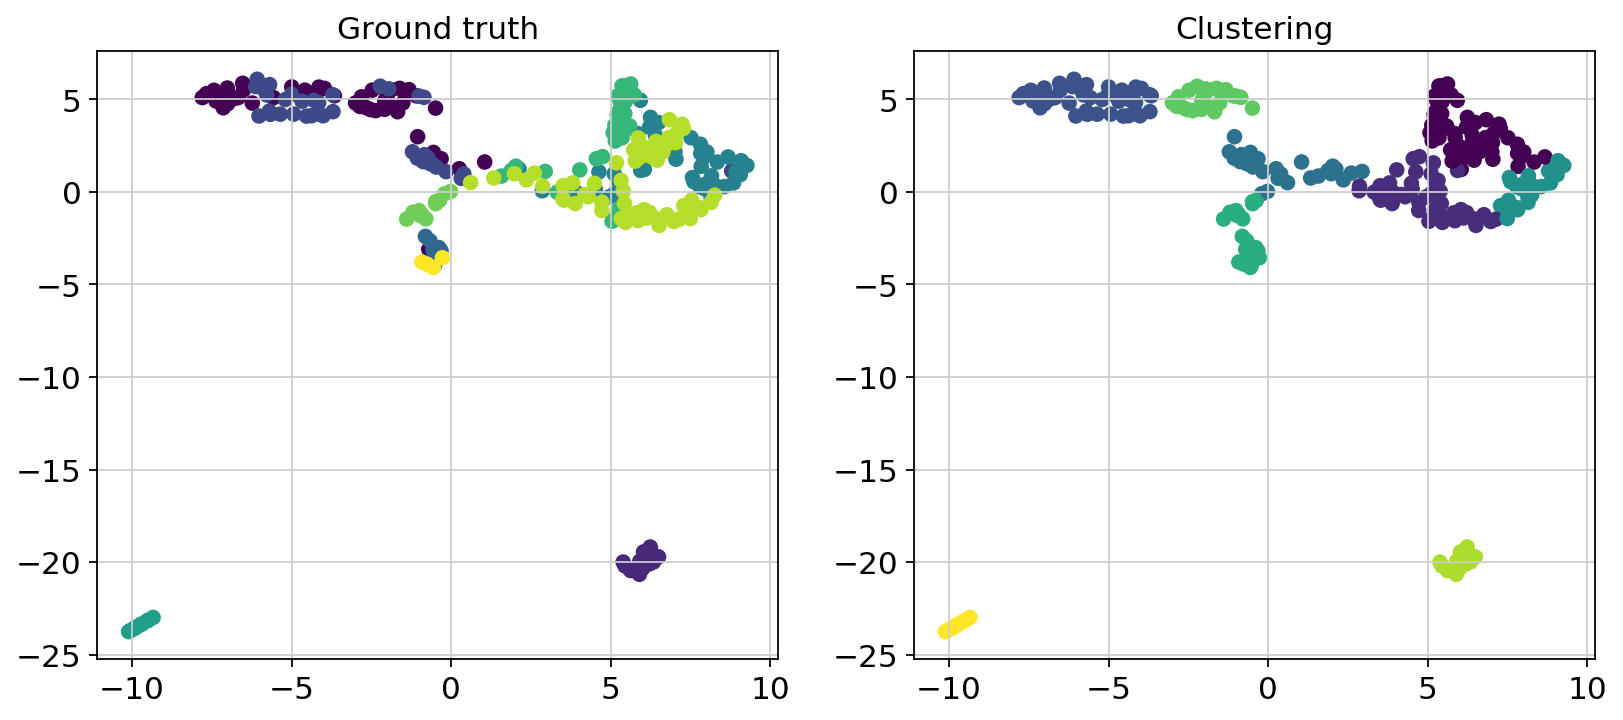

In [6]:
params = {}
params['load_inputDataset'] = inputDatasets[0]
params['preprocess_min_genes'] = 200
params['preprocess_min_cells'] = 3
# Define on the dataset
params['preprocess_teta_total_features'] = 14000
params['preprocess_normalize_per_cell'] = True
params['preprocess_filter_min_mean'] = None
params['preprocess_filter_max_mean']=None
params['preprocess_filter_min_disp']=None
params['preprocess_regress_out']=None
params['preprocess_scale']=10

params['cluster_n_neighbors'] = 10
params['cluster_n_pcs'] = 40
params['cluster_plot_pca'] = False

params['evaluate_plot_results'] = True
resultDict = seurat_utils.run(params)
results.append(resultDict)

## No scale

... reading from cache file ./cache/input-deng-matrix.h5ad
Loading dataset deng with 22431 genes and 268 cells
filtered out 2528 genes that are detected in less than 3 cells


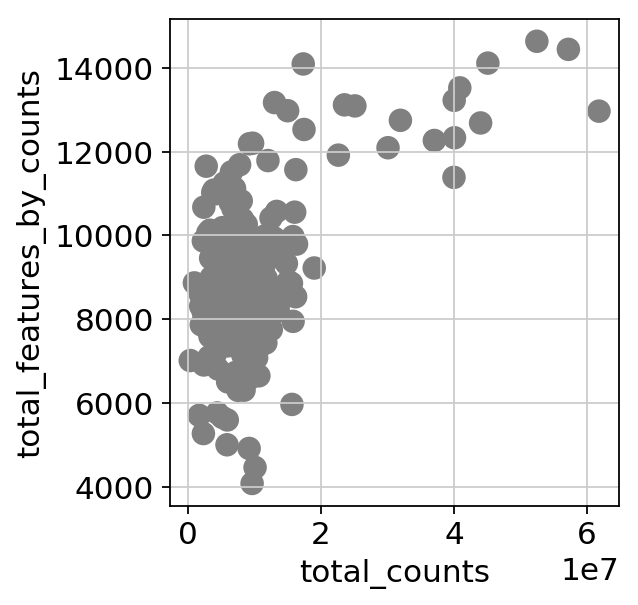

Filtering Counter({False: 13706, True: 6197})


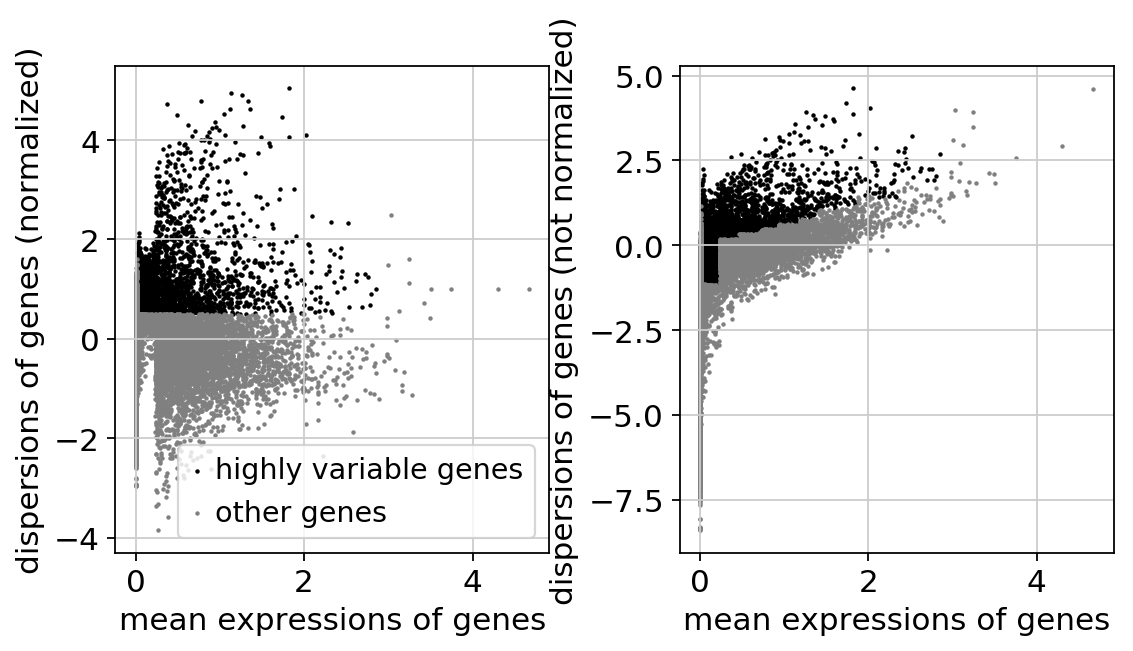

Keeping 6197 genes
regressing out ['total_counts']
    sparse input is densified and may lead to high memory use
    finished (0:00:14.03)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:00.09) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing UMAP
    finished (0:00:00.52) --> added
    'X_umap', UMAP coordinates (adata.obsm)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.01) --> found 9 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
Rand_index 0.31012203784383763


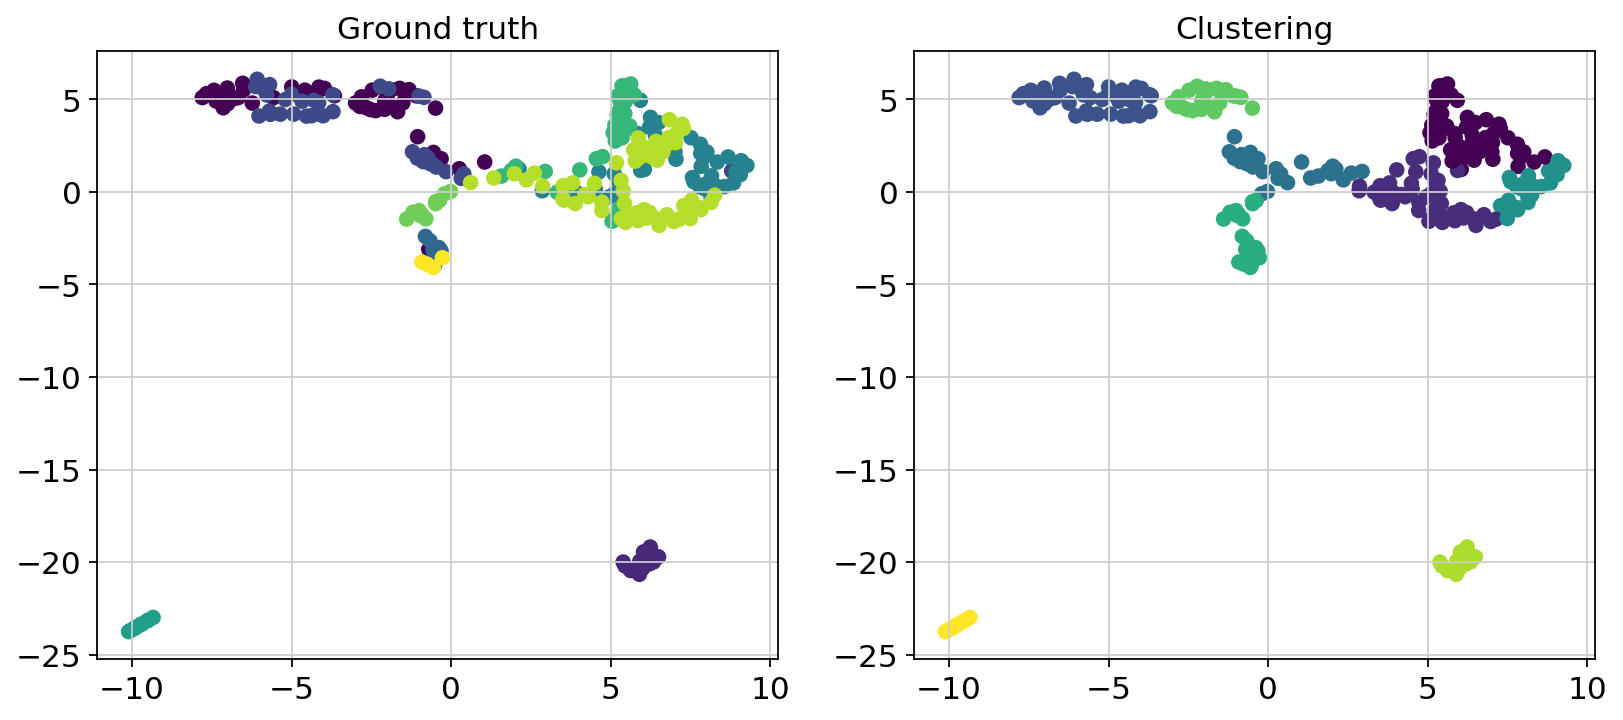

In [7]:
params = {}
params['load_inputDataset'] = inputDatasets[0]
params['preprocess_min_genes'] = 200
params['preprocess_min_cells'] = 3
# Define on the dataset
params['preprocess_teta_total_features'] = 14000
params['preprocess_normalize_per_cell'] = True
params['preprocess_filter_min_mean'] = 0.0125
params['preprocess_filter_max_mean']=3
params['preprocess_filter_min_disp']=0.5
params['preprocess_regress_out']='total_counts'
params['preprocess_scale']=None

params['cluster_n_neighbors'] = 10
params['cluster_n_pcs'] = 40
params['cluster_plot_pca'] = False

params['evaluate_plot_results'] = True
resultDict = seurat_utils.run(params)


In [8]:
results.append(resultDict)

## No min genes/cells filter

... reading from cache file ./cache/input-deng-matrix.h5ad
Loading dataset deng with 22431 genes and 268 cells


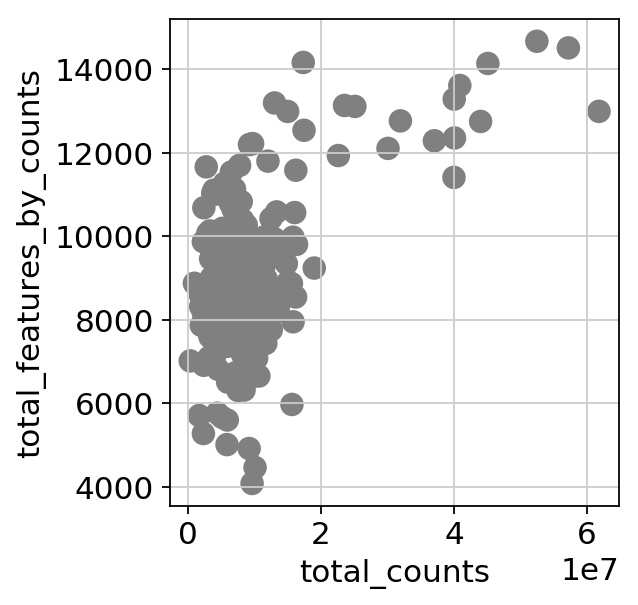

No dispertion gene filter
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:00.12) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing UMAP
    finished (0:00:00.64) --> added
    'X_umap', UMAP coordinates (adata.obsm)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.01) --> found 11 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
Rand_index 0.5661514663094637


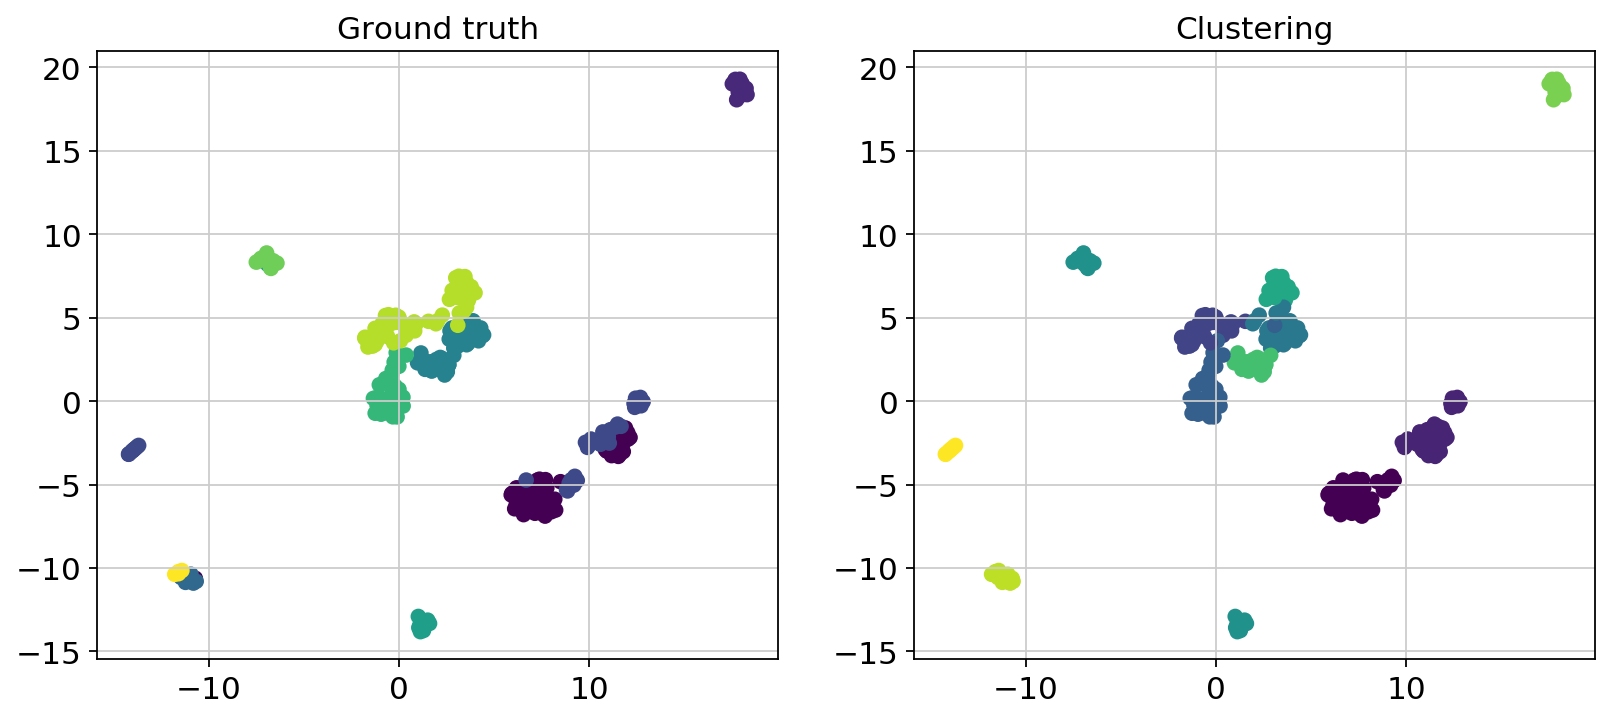

In [9]:
params = {}
params['load_inputDataset'] = inputDatasets[0]
params['preprocess_min_genes'] = None
params['preprocess_min_cells'] = None
# Define on the dataset
params['preprocess_teta_total_features'] = None
params['preprocess_normalize_per_cell'] = True
params['preprocess_filter_min_mean'] =None
params['preprocess_filter_max_mean']=None
params['preprocess_filter_min_disp']=None
params['preprocess_regress_out']=None
params['preprocess_scale']=None

params['cluster_n_neighbors'] = 10
params['cluster_n_pcs'] = 40
params['cluster_plot_pca'] = False

params['evaluate_plot_results'] = True
resultDict = seurat_utils.run(params)


In [10]:
results.append(resultDict)

## No preprocessing

... reading from cache file ./cache/input-deng-matrix.h5ad
Loading dataset deng with 22431 genes and 268 cells


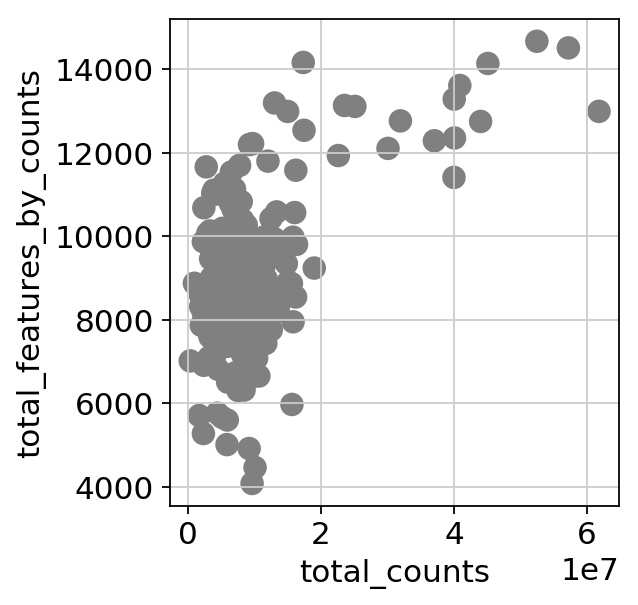

No dispertion gene filter
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:00.08) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing UMAP
    finished (0:00:00.66) --> added
    'X_umap', UMAP coordinates (adata.obsm)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.00) --> found 10 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
Rand_index 0.38819222426773975


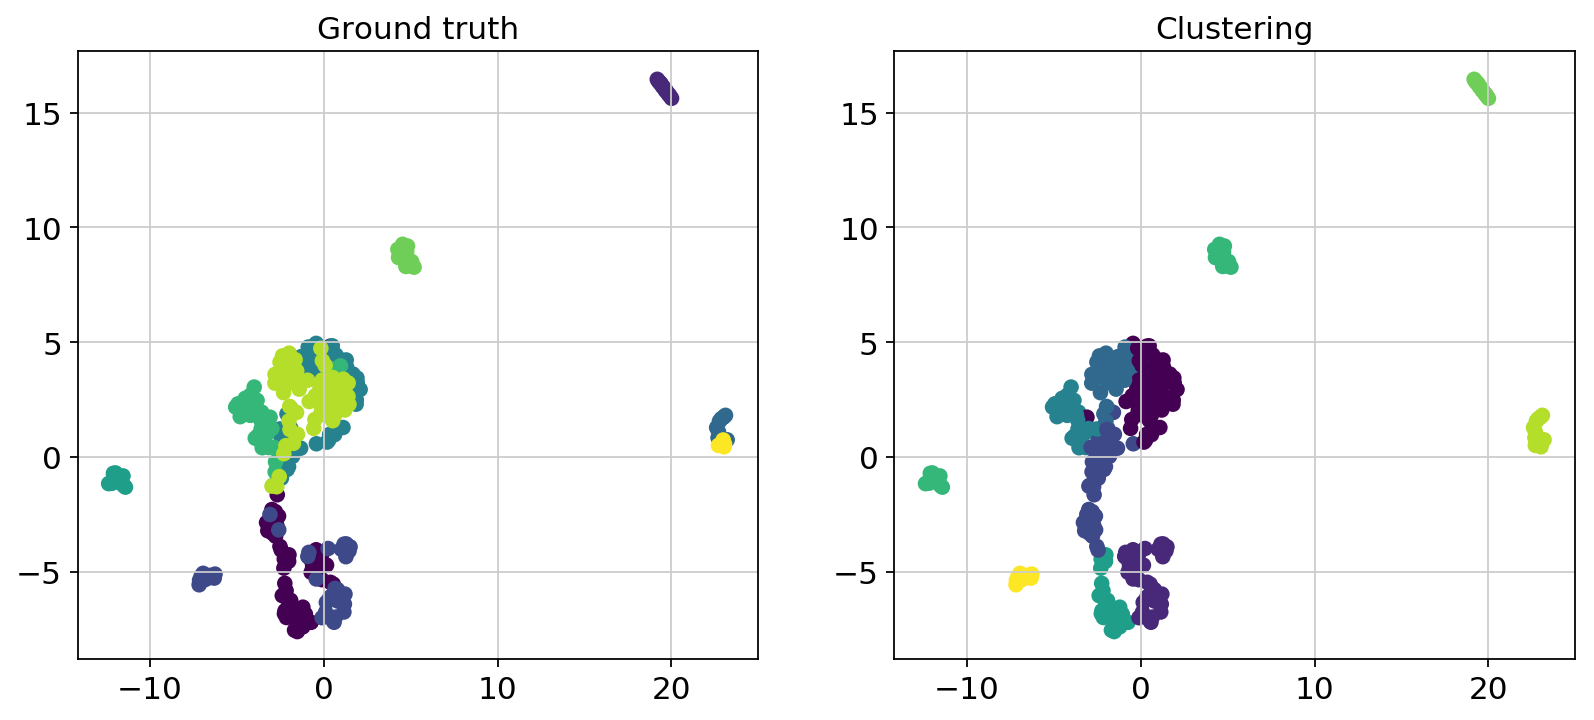

In [11]:
params = {}
params['load_inputDataset'] = inputDatasets[0]
params['preprocess_min_genes'] = None
params['preprocess_min_cells'] = None
# Define on the dataset
params['preprocess_teta_total_features'] = None
params['preprocess_normalize_per_cell'] = False
params['preprocess_filter_min_mean'] =None
params['preprocess_filter_max_mean']=None
params['preprocess_filter_min_disp']=None
params['preprocess_regress_out']=None
params['preprocess_scale']=None

params['cluster_n_neighbors'] = 10
params['cluster_n_pcs'] = 40
params['cluster_plot_pca'] = False

params['evaluate_plot_results'] = True
resultDict = seurat_utils.run(params)


In [12]:
results.append(resultDict)

## Normalization only, less clusters

... reading from cache file ./cache/input-deng-matrix.h5ad
Loading dataset deng with 22431 genes and 268 cells


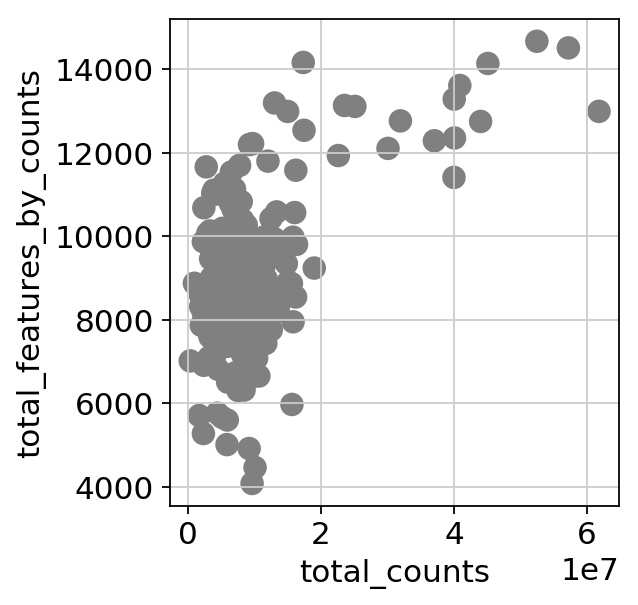

No dispertion gene filter
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished (0:00:00.07) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing UMAP
    finished (0:00:00.57) --> added
    'X_umap', UMAP coordinates (adata.obsm)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.00) --> found 12 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
Rand_index 0.5890523816104779


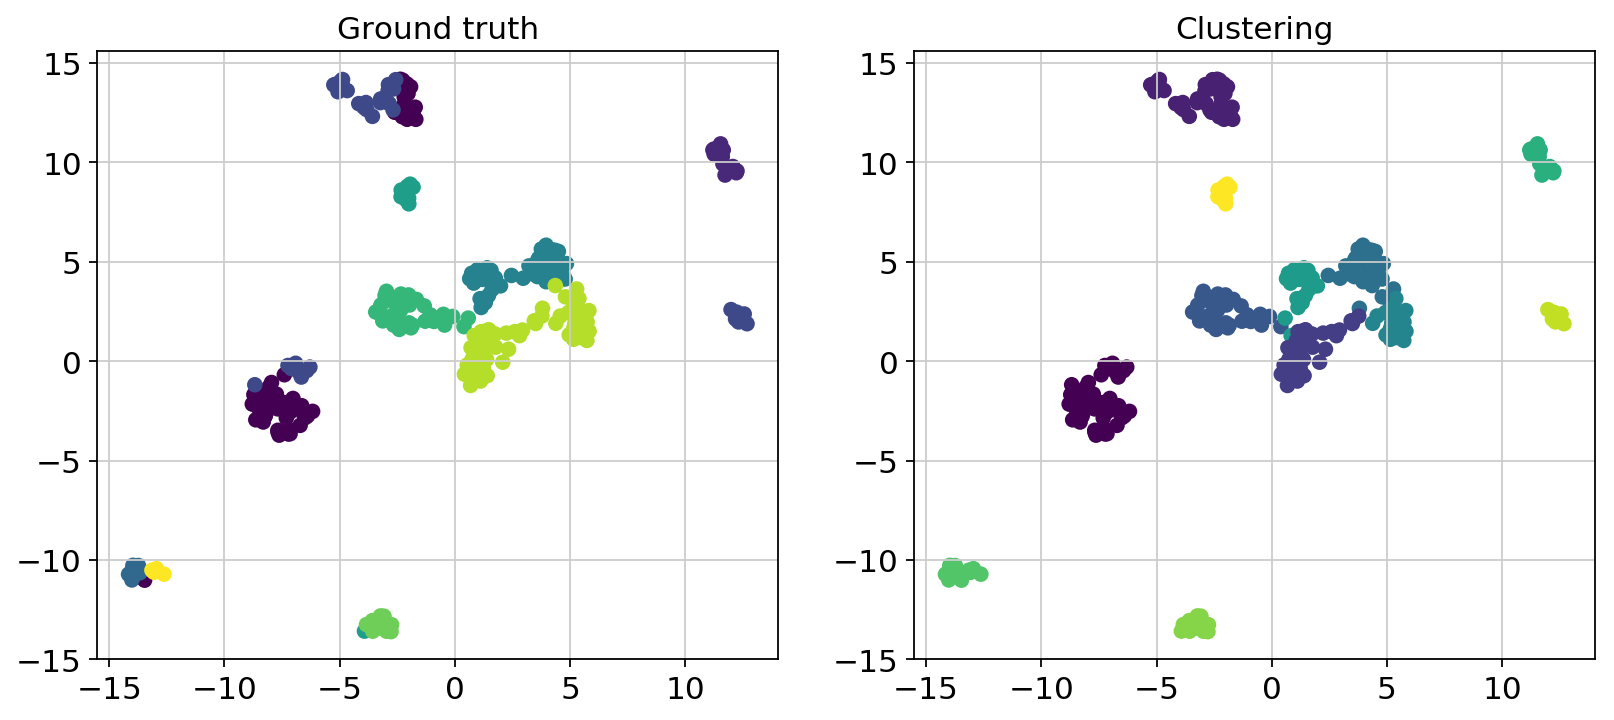

In [13]:
params = {}
params['load_inputDataset'] = inputDatasets[0]
params['preprocess_min_genes'] = None
params['preprocess_min_cells'] = None
# Define on the dataset
params['preprocess_teta_total_features'] = None
params['preprocess_normalize_per_cell'] = True
params['preprocess_filter_min_mean'] =None
params['preprocess_filter_max_mean']=None
params['preprocess_filter_min_disp']=None
params['preprocess_regress_out']=None
params['preprocess_scale']=None

params['cluster_n_neighbors'] = 8
params['cluster_n_pcs'] = 30
params['cluster_plot_pca'] = False

params['evaluate_plot_results'] = True
resultDict = seurat_utils.run(params)
results.append(resultDict)

## Normalization only, more clusters

... reading from cache file ./cache/input-deng-matrix.h5ad
Loading dataset deng with 22431 genes and 268 cells


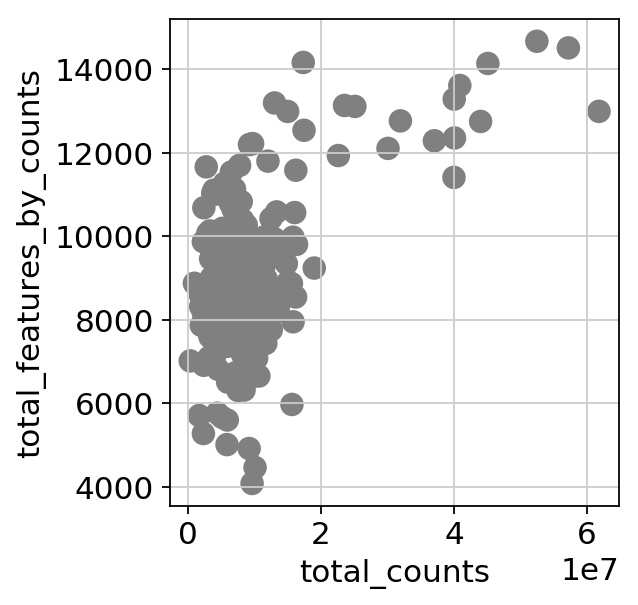

No dispertion gene filter
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00.15) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing UMAP
    finished (0:00:02.17) --> added
    'X_umap', UMAP coordinates (adata.obsm)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.01) --> found 7 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
Rand_index 0.5001372254145257


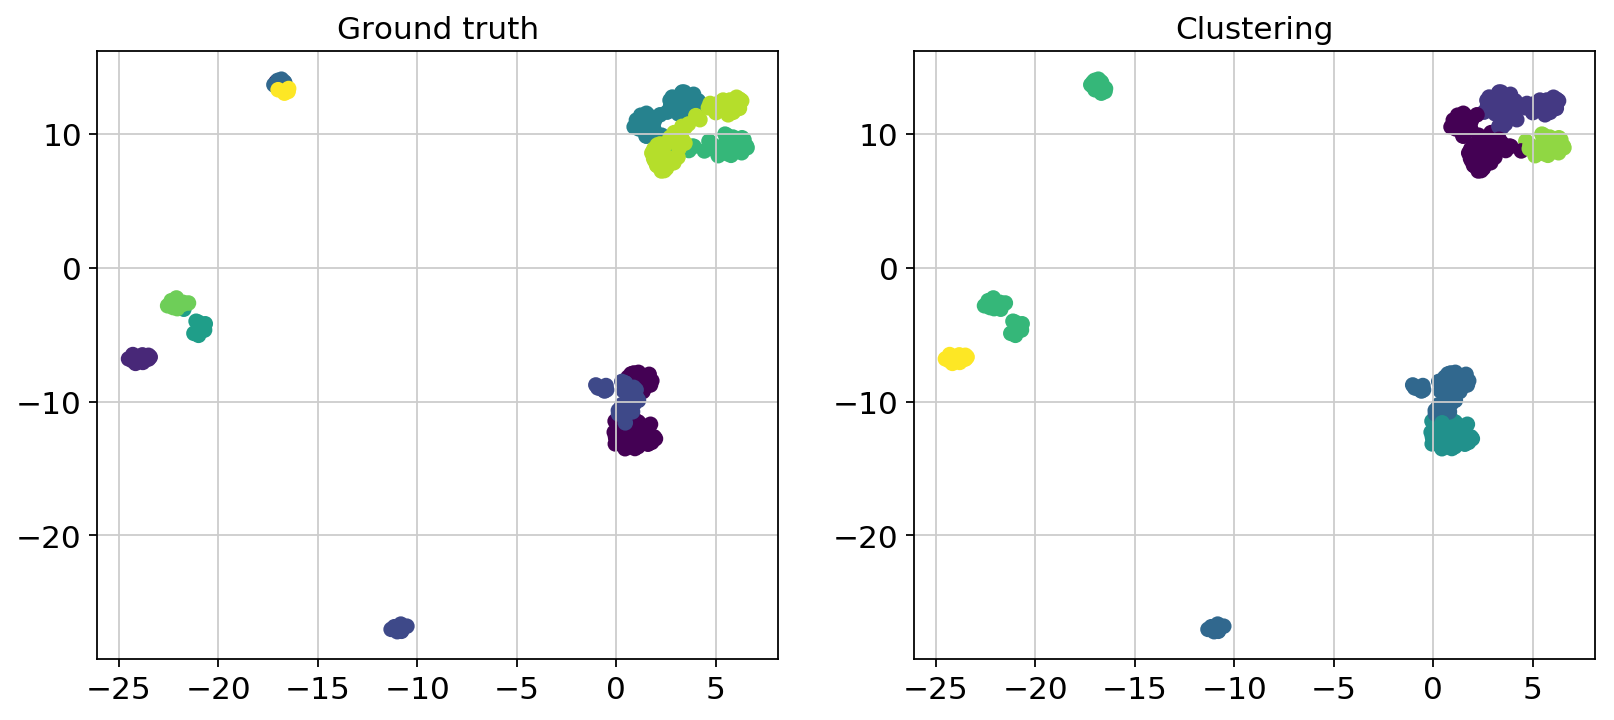

In [14]:
params = {}
params['load_inputDataset'] = inputDatasets[0]
params['preprocess_min_genes'] = None
params['preprocess_min_cells'] = None
# Define on the dataset
params['preprocess_teta_total_features'] = None
params['preprocess_normalize_per_cell'] = True
params['preprocess_filter_min_mean'] =None
params['preprocess_filter_max_mean']=None
params['preprocess_filter_min_disp']=None
params['preprocess_regress_out']=None
params['preprocess_scale']=None

params['cluster_n_neighbors'] = 15
params['cluster_n_pcs'] = 50
params['cluster_plot_pca'] = False

params['evaluate_plot_results'] = True
resultDict = seurat_utils.run(params)
results.append(resultDict)

## Filter less cells

... reading from cache file ./cache/input-deng-matrix.h5ad
Loading dataset deng with 22431 genes and 268 cells
filtered out 1894 genes that are detected in less than 2 cells


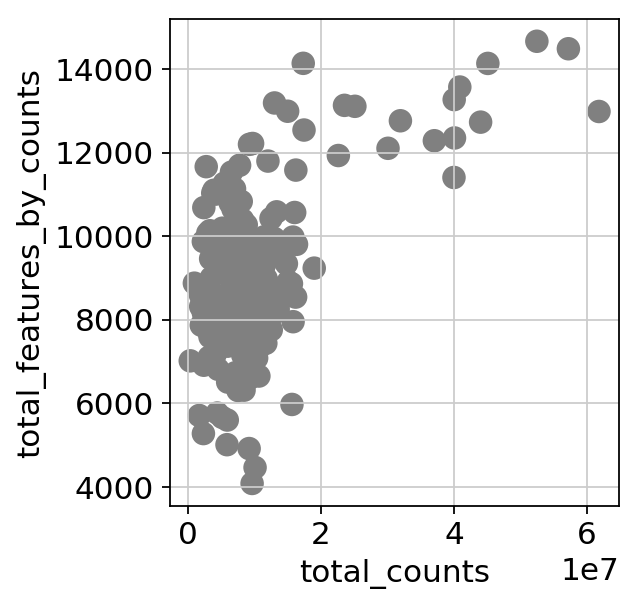

Filtering Counter({False: 13962, True: 6575})


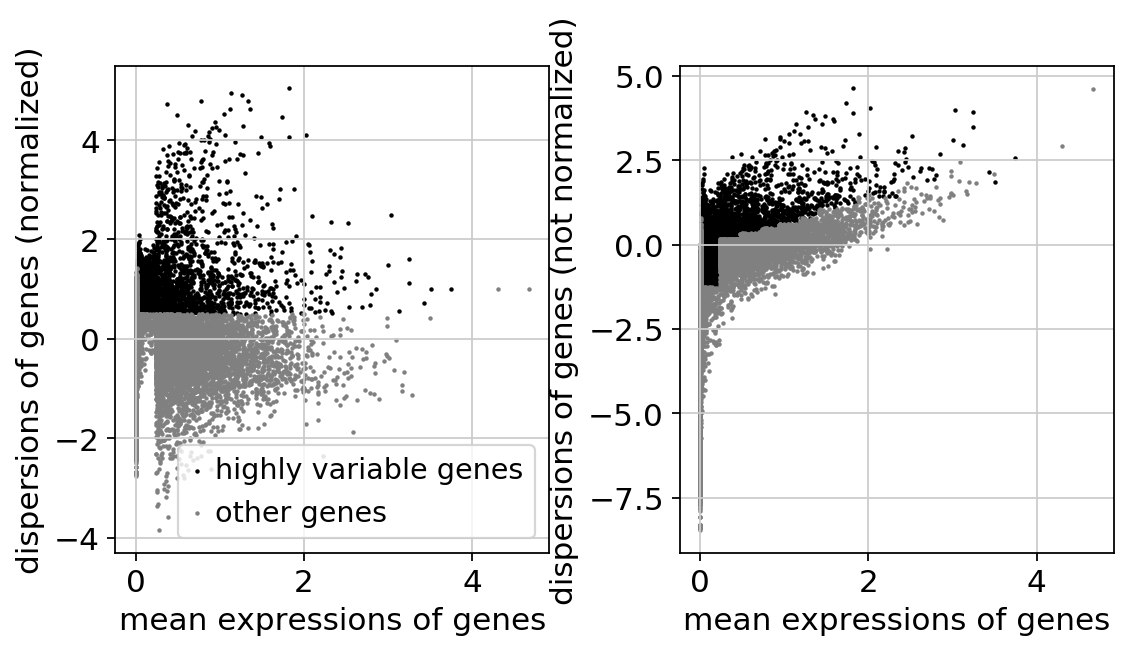

Keeping 6575 genes
regressing out ['total_counts']
    sparse input is densified and may lead to high memory use
    finished (0:00:13.65)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:00.10) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing UMAP
    finished (0:00:00.53) --> added
    'X_umap', UMAP coordinates (adata.obsm)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.01) --> found 9 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
Rand_index 0.31012203784383763


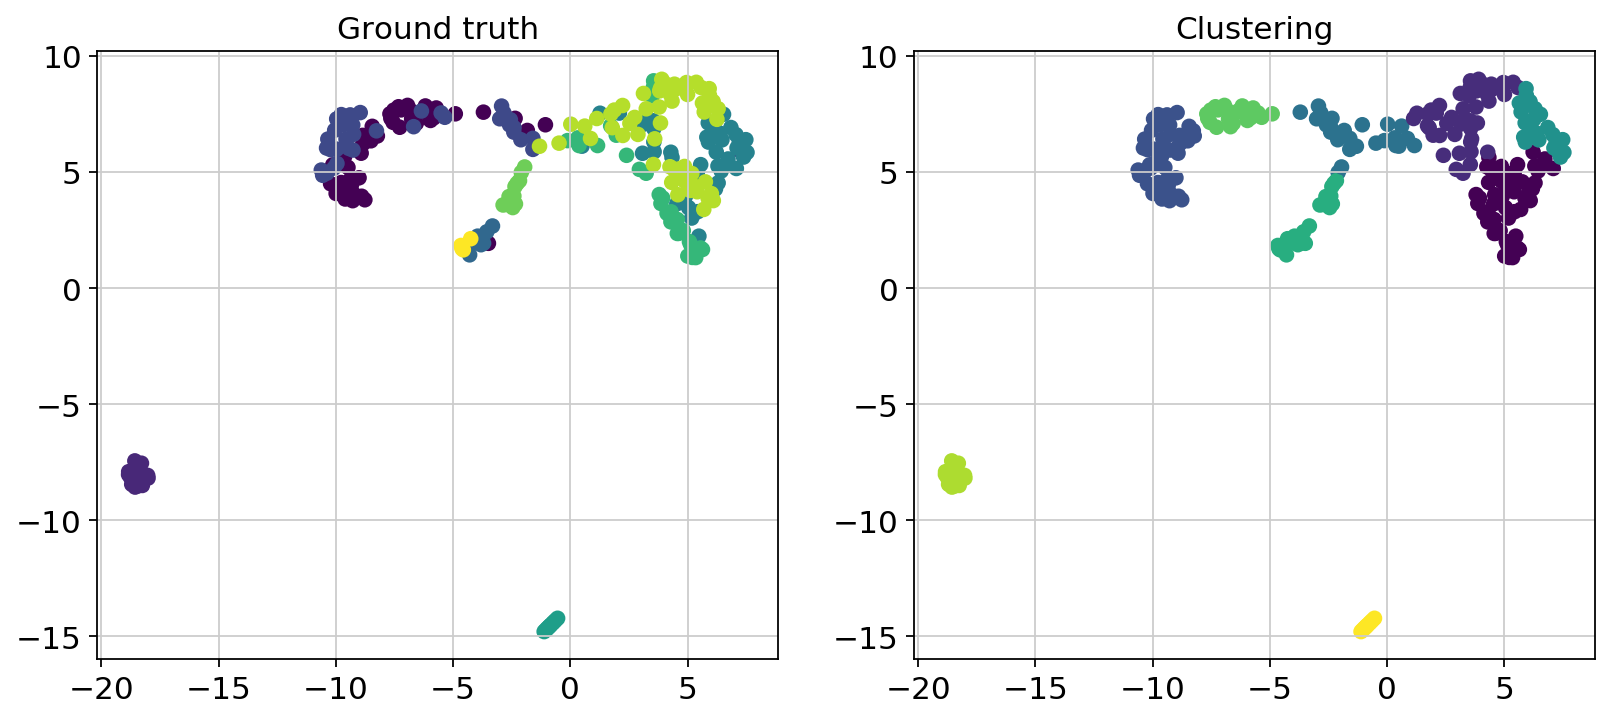

In [15]:
params = {}
params['load_inputDataset'] = inputDatasets[0]
params['preprocess_min_genes'] = 200
params['preprocess_min_cells'] = 2
# Define on the dataset
params['preprocess_teta_total_features'] = 14000
params['preprocess_normalize_per_cell'] = True
params['preprocess_filter_min_mean'] = 0.01
params['preprocess_filter_max_mean']=4
params['preprocess_filter_min_disp']=0.5
params['preprocess_regress_out']='total_counts'
params['preprocess_scale']=15

params['cluster_n_neighbors'] = 10
params['cluster_n_pcs'] = 40
params['cluster_plot_pca'] = False

params['evaluate_plot_results'] = True
resultDict = seurat_utils.run(params)
results.append(resultDict)

... reading from cache file ./cache/input-deng-matrix.h5ad
Loading dataset deng with 22431 genes and 268 cells
filtered out 2528 genes that are detected in less than 3 cells


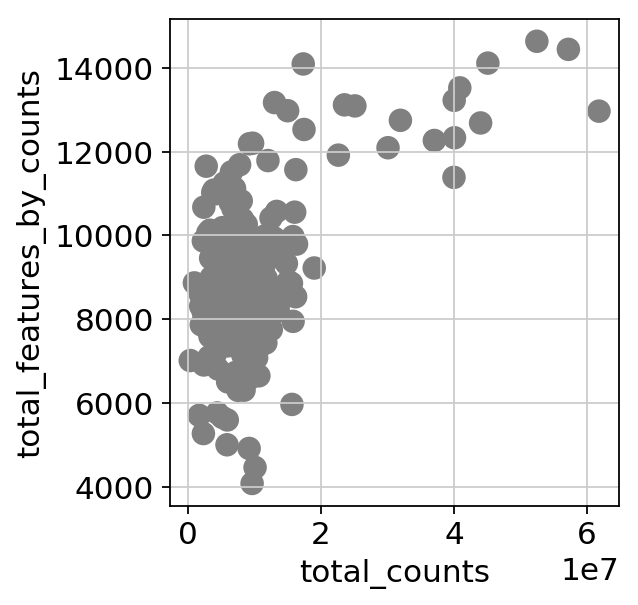

Filtering Counter({False: 13706, True: 6197})


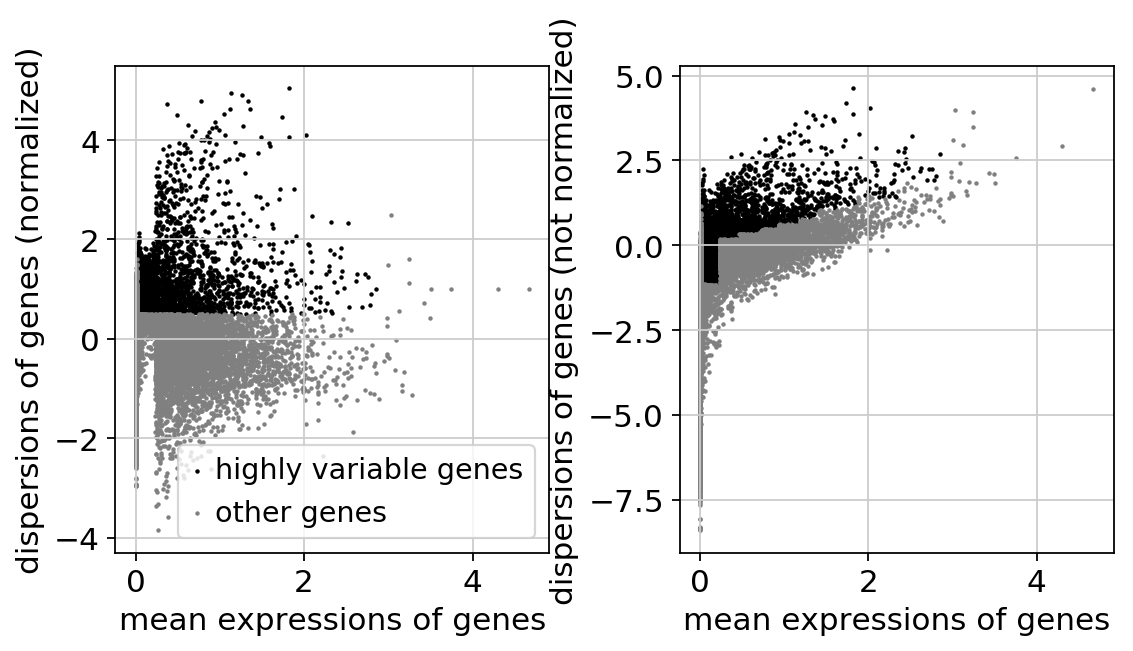

Keeping 6197 genes
regressing out ['total_counts']
    sparse input is densified and may lead to high memory use
    finished (0:00:13.04)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:00.10) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing UMAP
    finished (0:00:00.56) --> added
    'X_umap', UMAP coordinates (adata.obsm)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.01) --> found 9 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
Rand_index 0.31012203784383763


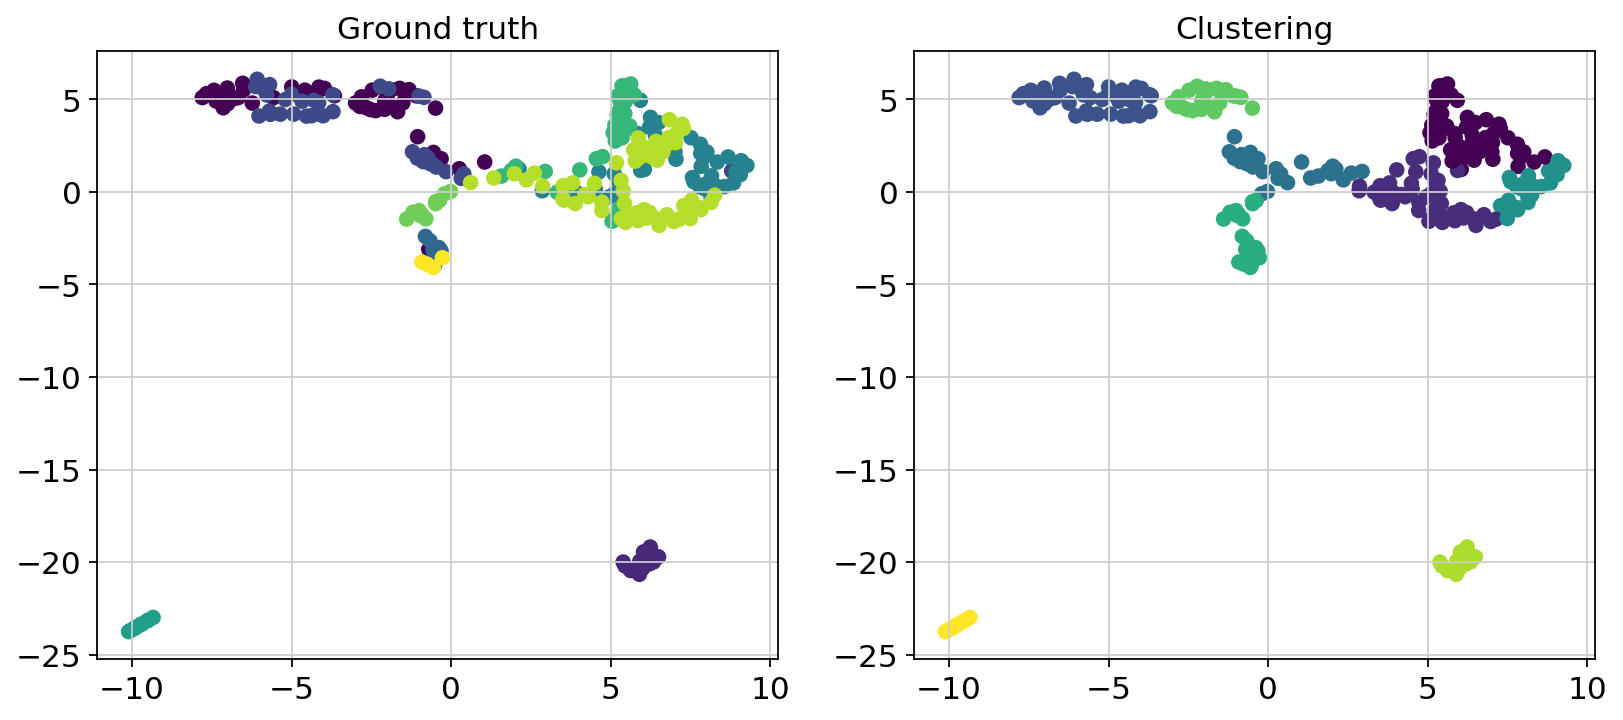

In [16]:
params = {}
params['load_inputDataset'] = inputDatasets[0]
params['preprocess_min_genes'] = 200
params['preprocess_min_cells'] = 3
# Define on the dataset
params['preprocess_teta_total_features'] = 14000
params['preprocess_normalize_per_cell'] = True
params['preprocess_filter_min_mean'] = 0.0125
params['preprocess_filter_max_mean']=3
params['preprocess_filter_min_disp']=0.5
params['preprocess_regress_out']='total_counts'
params['preprocess_scale']=10

params['cluster_n_neighbors'] = 10
params['cluster_n_pcs'] = 40
params['cluster_plot_pca'] = False

params['evaluate_plot_results'] = True
resultDict = seurat_utils.run(params)
results.append(resultDict)

## Render all combinations

In [17]:
pd.DataFrame( results)

,cluster_n_neighbors,cluster_n_pcs,cluster_plot_pca,evaluate_plot_results,load_inputDataset,preprocess_filter_max_mean,preprocess_filter_min_disp,preprocess_filter_min_mean,preprocess_min_cells,preprocess_min_genes,preprocess_normalize_per_cell,preprocess_regress_out,preprocess_scale,preprocess_teta_total_features,randIndex
0,10,40,False,True,deng,3.0,0.5,0.0125,3.0,200.0,True,None,10.0,NaN,0.484943
1,10,40,False,True,deng,NaN,NaN,NaN,3.0,200.0,True,None,10.0,14000.0,0.310122
2,10,40,False,True,deng,3.0,0.5,0.0125,3.0,200.0,True,total_counts,NaN,14000.0,0.310122
3,10,40,False,True,deng,NaN,NaN,NaN,NaN,NaN,True,None,NaN,NaN,0.566151
4,10,40,False,True,deng,NaN,NaN,NaN,NaN,NaN,False,None,NaN,NaN,0.388192
5,8,30,False,True,deng,NaN,NaN,NaN,NaN,NaN,True,None,NaN,NaN,0.589052
6,15,50,False,True,deng,NaN,NaN,NaN,NaN,NaN,True,None,NaN,NaN,0.500137
7,10,40,False,True,deng,4.0,0.5,0.0100,2.0,200.0,True,total_counts,15.0,14000.0,0.310122
8,10,40,False,True,deng,3.0,0.5,0.0125,3.0,200.0,True,total_counts,10.0,14000.0,0.310122
